---

## 🔧 Importación de Librerías

Estas son las tres librerías fundamentales que usaremos:

In [43]:
import sympy as sp              # para álgebra simbólica (integración, derivación, ecuaciones)
import numpy as np              # para operaciones numéricas y crear arrays de datos
import matplotlib.pyplot as plt # para crear visualizaciones y gráficos

---

## 📖 PARTE 1: FUNDAMENTOS TEÓRICOS

### 1.1 ¿Qué es una Integral Indefinida?

La **integral indefinida** es la operación inversa a la derivada. Si tenemos una función marginal (derivada), la integral nos permite recuperar la función total (original).

**Definición matemática:**

Si $F'(x) = f(x)$, entonces:

$$\int f(x) \, dx = F(x) + C$$

donde:
- $f(x)$ es la **función marginal** (conocida)
- $F(x)$ es la **función total** (que queremos encontrar)
- $C$ es la **constante de integración** (valor fijo desconocido)

---

### 1.2 Interpretación Económica

| Función Marginal | Función Total | Constante |
|------------------|---------------|------------|
| $CMg(q)$ = Costo Marginal | $C(q)$ = Costo Total | $F$ = Costo Fijo |
| $IMg(q)$ = Ingreso Marginal | $I(q)$ = Ingreso Total | $0$ (si $I(0)=0$) |
| $UMg(q)$ = Utilidad Marginal | $U(q)$ = Utilidad Total | $0$ (si $U(0)=0$) |
| $PMg(L)$ = Productividad Marginal | $P(L)$ = Producto Total | $0$ (si $P(0)=0$) |

**Ejemplo:** Si una empresa sabe que su costo adicional por unidad es $CMg(q) = 20 + 2q$, puede calcular su costo total integrando esta función.

---

## 🎯 PARTE 2: METODOLOGÍA ESTANDARIZADA (7 PASOS)

Esta es la secuencia de pasos que **SIEMPRE** debes seguir para resolver problemas de integrales indefinidas en economía:

```
PASO 1: Definir variables simbólicas
PASO 2: Definir la función marginal (dato del problema)
PASO 3: Integrar para obtener la función total
PASO 4: Determinar la constante de integración
PASO 5: Calcular funciones derivadas (costo medio, beneficio, etc.)
PASO 6: Encontrar puntos críticos (óptimos)
PASO 7: Visualizar las funciones
```

---

## 💡 EJEMPLO COMPLETO PASO A PASO

### Problema:

Una empresa en competencia perfecta tiene un **costo marginal** $CMg(q) = 20 + 2q$ y sabemos que cuando no produce nada ($q=0$), su costo es $C(0) = 100$ (costo fijo).

**Se pide:**
1. Obtener la función de costo total $C(q)$
2. Calcular el costo medio $C_{med}(q)$
3. Encontrar el costo medio mínimo
4. Visualizar las funciones

### ✅ PASO 1: Definir variables simbólicas

**¿Por qué?** Necesitamos crear objetos matemáticos que SymPy pueda manipular algebraicamente.

**¿Cómo?** Usamos `sp.symbols()` con restricciones apropiadas.

In [44]:
# Crear variable de cantidad (q)
# positive=True asegura que q > 0 (no tiene sentido cantidad negativa)
q = sp.symbols('q', positive=True)

# Crear variable para la constante de integración (costo fijo)
# Sin restricciones porque puede ser cualquier valor real
F = sp.symbols('F')

print(f"Variable de cantidad: {q}")
print(f"Variable de costo fijo: {F}")

Variable de cantidad: q
Variable de costo fijo: F


### ✅ PASO 2: Definir la función marginal

**¿Qué hacer?** Transcribir exactamente la función marginal que nos da el problema.

**¿Cómo?** Usar operadores de Python: `+`, `-`, `*`, `**` (potencia)

In [45]:
# Definir CMg(q) = 20 + 2q
# Interpretación económica: por cada unidad adicional producida,
# el costo aumenta en $20 más $2 por cada unidad ya producida
CMg = 20 + 2 * q

print("Costo Marginal:")
CMg

Costo Marginal:


2*q + 20

### ✅ PASO 3: Integrar para obtener la función total

**¿Qué hace `sp.integrate()`?** Calcula la antiderivada (integral indefinida).

**Sintaxis:** `sp.integrate(función, variable)`

**⚠️ Decisión crítica:** ¿Agregar `+ F` o no?
- **SÍ** si hay costo fijo (costos)
- **NO** si la función es cero cuando q=0 (ingresos, utilidad)

In [46]:
# Integrar CMg respecto a q y agregar constante F
# sp.integrate() encuentra la antiderivada
# + F representa el costo fijo (constante de integración)
C = sp.integrate(CMg, q) + F

print("Costo Total (con constante F):")
C

Costo Total (con constante F):


F + q**2 + 20*q

**💡 Verificación:** Si derivamos $C(q)$, deberíamos recuperar $CMg(q)$:

In [47]:
# Verificar: la derivada de C debe ser igual a CMg
verificacion = sp.diff(C, q)
print(f"dC/dq = {verificacion}")
print(f"CMg   = {CMg}")
print(f"¿Son iguales? {verificacion == CMg}")

dC/dq = 2*q + 20
CMg   = 2*q + 20
¿Son iguales? True


### ✅ PASO 4: Determinar la constante de integración

**¿Por qué?** La constante $F$ es desconocida. Usamos una condición inicial del problema para encontrarla.

**Método:**
1. Sustituir el valor conocido (ej: $q=0$) en la función
2. Crear una ecuación con `sp.Eq()`
3. Resolver con `sp.solve()`
4. Extraer el primer resultado con `[0]`

In [48]:
# Condición: C(0) = 100 (costo fijo)
# .subs(q, 0) sustituye q por 0 en la expresión C
# sp.Eq() crea la ecuación: C(0) = 100
# sp.solve() resuelve la ecuación para encontrar F
# [0] extrae la primera solución de la lista

condicion = sp.Eq(C.subs(q, 0), 100)
print(f"Ecuación a resolver: {condicion}")

F_sol = sp.solve(condicion, F)[0]
print(f"\nSolución: F = {F_sol}")

Ecuación a resolver: Eq(F, 100)

Solución: F = 100


In [49]:
# Sustituir el valor de F encontrado en la función C
# .subs(F, F_sol) reemplaza F por su valor numérico
C = C.subs(F, F_sol)

print("Costo Total final:")
C

Costo Total final:


q**2 + 20*q + 100

**Interpretación económica:**

$$C(q) = q^2 + 20q + 100$$

- **$100$**: Costo fijo (pago aunque no produzca nada)
- **$20q$**: Costo variable lineal
- **$q^2$**: Costo variable cuadrático (rendimientos decrecientes)

### ✅ PASO 5: Calcular funciones derivadas

**Costo Medio:** $C_{med}(q) = \frac{C(q)}{q}$

**¿Por qué simplificar?** `sp.simplify()` reduce fracciones y expresiones complejas a su forma más simple.

In [50]:
# Calcular costo medio dividiendo costo total entre cantidad
CMed = C / q
print("Costo Medio (sin simplificar):")
print(CMed)

# Simplificar la expresión algebraica
CMed = sp.simplify(CMed)
print("\nCosto Medio (simplificado):")
CMed

Costo Medio (sin simplificar):
(q**2 + 20*q + 100)/q

Costo Medio (simplificado):


q + 20 + 100/q

### ✅ PASO 6: Encontrar puntos críticos

**Para encontrar mínimos/máximos:**
1. Derivar la función
2. Igualar la derivada a cero
3. Resolver la ecuación

**¿Por qué?** En el punto mínimo, la pendiente (derivada) es cero.

In [51]:
# Derivar el costo medio respecto a q
# sp.diff(función, variable) calcula la derivada
dCMed = sp.diff(CMed, q)

print("Derivada del Costo Medio:")
print(dCMed)

Derivada del Costo Medio:
1 - 100/q**2


In [52]:
# Encontrar q donde dCMed/dq = 0 (punto crítico)
# sp.Eq(dCMed, 0) crea la ecuación dCMed = 0
# sp.solve() encuentra los valores de q que satisfacen la ecuación
q_min = sp.solve(sp.Eq(dCMed, 0), q)[0]

print(f"Cantidad que minimiza el costo medio: q* = {q_min}")

Cantidad que minimiza el costo medio: q* = 10


In [53]:
# Evaluar el costo medio en el punto mínimo
# .subs(q, q_min) sustituye q por q_min en la expresión CMed
CMed_min = sp.simplify(CMed.subs(q, q_min))

print(f"Costo Medio Mínimo: {CMed_min}")
print(f"\nInterpretación: La empresa es más eficiente cuando produce {q_min} unidades,")
print(f"con un costo promedio de ${CMed_min} por unidad.")

Costo Medio Mínimo: 40

Interpretación: La empresa es más eficiente cuando produce 10 unidades,
con un costo promedio de $40 por unidad.


### ✅ PASO 7: Visualizar las funciones

**Proceso de visualización:**
1. Crear dominio con `np.linspace()`
2. Convertir funciones simbólicas a numéricas con `sp.lambdify()`
3. Evaluar funciones en el dominio
4. Graficar con `matplotlib`

In [54]:
# 7.1 Crear dominio (rango de valores de q para graficar)
# np.linspace(inicio, fin, cantidad_puntos)
# Empezamos en 0.1 (no 0) para evitar división por cero en CMed
q_grid = np.linspace(0.1, 15, 300)

print(f"Dominio creado: {len(q_grid)} puntos desde {q_grid[0]} hasta {q_grid[-1]}")

Dominio creado: 300 puntos desde 0.1 hasta 15.0


In [55]:
# 7.2 Convertir expresiones simbólicas a funciones numéricas
# sp.lambdify(variable_entrada, expresión_simbólica)
# Crea una función Python que puede evaluarse con arrays de NumPy

C_num = sp.lambdify(q, C)        # Función numérica para C(q)
CMg_num = sp.lambdify(q, CMg)    # Función numérica para CMg(q)
CMed_num = sp.lambdify(q, CMed)  # Función numérica para CMed(q)

print("Funciones numéricas creadas exitosamente")

Funciones numéricas creadas exitosamente


In [56]:
# 7.3 Evaluar funciones en todos los puntos del dominio
# Esto genera arrays con los valores de y para cada x

C_vals = C_num(q_grid)      # Valores de costo total
CMg_vals = CMg_num(q_grid)  # Valores de costo marginal
CMed_vals = CMed_num(q_grid)# Valores de costo medio

print(f"Valores calculados para {len(q_grid)} puntos")

Valores calculados para 300 puntos


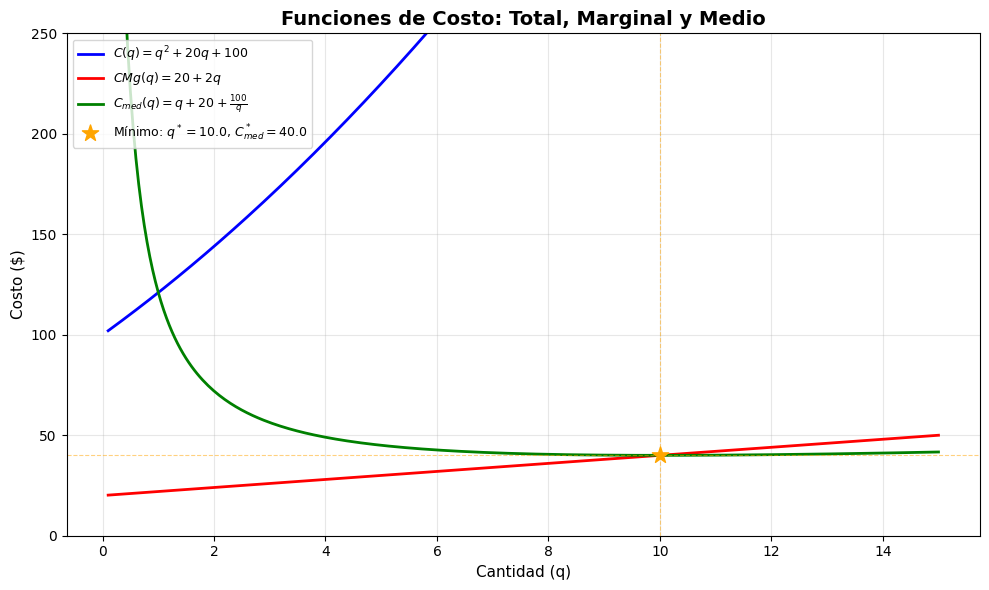

In [57]:
# 7.4 Crear visualización profesional
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las tres funciones
ax.plot(q_grid, C_vals, label='$C(q) = q^2 + 20q + 100$', linewidth=2, color='blue')
ax.plot(q_grid, CMg_vals, label='$CMg(q) = 20 + 2q$', linewidth=2, color='red')
ax.plot(q_grid, CMed_vals, label='$C_{med}(q) = q + 20 + \\frac{100}{q}$', linewidth=2, color='green')

# Marcar el punto mínimo del costo medio
ax.scatter([q_min], [CMed_min], c='orange', s=150, zorder=5, marker='*',
           label=f'Mínimo: $q^* = {float(q_min):.1f}$, $C_{{med}}^* = {float(CMed_min):.1f}$')

# Líneas de referencia (ayudan a identificar el punto óptimo)
ax.axhline(CMed_min, color='orange', linewidth=0.8, linestyle='--', alpha=0.5)
ax.axvline(q_min, color='orange', linewidth=0.8, linestyle='--', alpha=0.5)
ax.axhline(0, color='black', linewidth=0.5)  # Eje horizontal

# Configurar el gráfico
ax.grid(True, alpha=0.3)
ax.set_xlabel('Cantidad (q)', fontsize=11)
ax.set_ylabel('Costo ($)', fontsize=11)
ax.set_title('Funciones de Costo: Total, Marginal y Medio', fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.set_ylim(0, 250)

plt.tight_layout()
plt.show()

**📊 Interpretación del Gráfico:**

1. **Costo Total (azul):** Crece de forma cuadrática (parábola)
2. **Costo Marginal (rojo):** Línea recta creciente (cada unidad adicional es más cara)
3. **Costo Medio (verde):** Forma de U (disminuye hasta q=10, luego aumenta)
4. **Punto óptimo (★):** En q=10, el costo promedio es mínimo ($40 por unidad)

**🎯 Decisión empresarial:** La escala eficiente mínima es producir 10 unidades.

---

## 🧮 PARTE 3: TABLA DE FUNCIONES ECONÓMICAS

### Fórmulas Clave para Memorizar

| Concepto | Relación Matemática | Condición Típica | Punto Óptimo |
|----------|---------------------|------------------|---------------|
| **Costo Total** | $C(q) = \int CMg(q) dq + F$ | $C(0) = F$ | - |
| **Costo Medio** | $C_{med}(q) = \frac{C(q)}{q}$ | - | $\frac{dC_{med}}{dq} = 0$ |
| **Ingreso Total** | $I(q) = \int IMg(q) dq$ | $I(0) = 0$ | - |
| **Beneficio** | $B(q) = I(q) - C(q)$ | - | $IMg = CMg$ |
| **Utilidad Total** | $U(q) = \int UMg(q) dq$ | $U(0) = 0$ | $UMg = 0$ |
| **Producto Total** | $P(L) = \int PMg(L) dL$ | $P(0) = 0$ | - |

---

## 📊 PARTE 4: ESTRUCTURAS DE MERCADO - CUADRO COMPARATIVO

### ¿Cuándo igualar IMg = CMg vs P = CMg?

Esta tabla te ayuda a recordar las condiciones de equilibrio según la estructura de mercado:

| Estructura | Función de Ingreso Total | Ingreso Marginal | Condición de Equilibrio | ¿Por qué? |
|------------|--------------------------|------------------|------------------------|-----------|
| **Competencia Perfecta** | $I(q) = p \cdot q$ | $IMg = p$ (constante) | $\boxed{p = CMg}$ | La empresa es **precio-aceptante**, no puede influir en el precio. El precio ES el ingreso marginal. |
| **Monopolio** | $I(q) = p(q) \cdot q$ | $IMg = \frac{dI}{dq}$ | $\boxed{IMg = CMg}$ | La empresa **fija el precio** mediante la cantidad. El IMg depende de la demanda y es menor que el precio. |
| **Duopolio** | $I_i(q_i, q_j) = p(Q) \cdot q_i$ | $IMg_i = \frac{\partial I_i}{\partial q_i}$ | $\boxed{IMg_i = CMg_i}$ | Cada empresa considera la producción de la otra. Se busca el **equilibrio de Nash** donde ambas maximizan simultáneamente. |

---

### 🔍 Detalles por Estructura de Mercado

#### 1️⃣ **COMPETENCIA PERFECTA**

**Características:**
- Muchas empresas pequeñas
- Producto homogéneo
- Precio determinado por el mercado
- Empresa = precio-aceptante

**Funciones:**
```python
# Precio de mercado (constante)
p = 80  # Dato del problema

# Ingreso Total
I = p * q  # Lineal

# Ingreso Marginal
IMg = p  # Constante, igual al precio

# Condición de equilibrio
# p = CMg
q_opt = sp.solve(sp.Eq(p, CMg), q)[0]
```

**Ejemplo práctico:**
- Precio de mercado: $p = 80$
- Costo marginal: $CMg(q) = 10 + 2q$
- **Equilibrio:** $80 = 10 + 2q \Rightarrow q^* = 35$

**Interpretación:** La empresa produce hasta que el costo de la última unidad iguala el precio de mercado.

---

#### 2️⃣ **MONOPOLIO**

**Características:**
- Una sola empresa
- Sin sustitutos cercanos
- Empresa = precio-decisora
- Enfrenta toda la demanda del mercado

**Funciones:**
```python
# Función de demanda inversa
p = 200 - 2*q  # Dato del problema

# Ingreso Total (multiplicar demanda por cantidad)
I = p * q  # = (200 - 2q) * q = 200q - 2q²

# Ingreso Marginal (derivar el ingreso total)
IMg = sp.diff(I, q)  # = 200 - 4q

# Condición de equilibrio
# IMg = CMg
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]
```

**Ejemplo práctico:**
- Demanda inversa: $p = 200 - 2q$
- Ingreso total: $I(q) = 200q - 2q^2$
- Ingreso marginal: $IMg = 200 - 4q$
- Costo marginal: $CMg = 20 + 2q$
- **Equilibrio:** $200 - 4q = 20 + 2q \Rightarrow q^* = 30$

**⚠️ Observación clave:** 
- En monopolio: $IMg \neq p$ (el IMg siempre es menor que el precio)
- Si la demanda es $p = a - bq$, entonces $IMg = a - 2bq$ (¡el coeficiente se duplica!)

---

#### 3️⃣ **DUOPOLIO (Cournot)**

**Características:**
- Dos empresas compiten
- Cada una elige cantidad simultáneamente
- Considera la producción de la rival como dada
- Buscan equilibrio de Nash

**Funciones:**
```python
# Variables para ambas empresas
q1, q2 = sp.symbols('q1 q2', positive=True)

# Producción total
Q = q1 + q2

# Función de demanda inversa
p = 200 - Q  # = 200 - (q1 + q2)

# Ingreso Total empresa 1
I1 = p * q1  # = (200 - q1 - q2) * q1

# Ingreso Marginal empresa 1 (derivada parcial respecto a q1)
IMg1 = sp.diff(I1, q1)  # = 200 - 2q1 - q2

# Condición de equilibrio empresa 1
# IMg1 = CMg1
# Resolver para q1 en función de q2 (función de reacción)
```

**Ejemplo práctico:**
- Demanda: $p = 200 - (q_1 + q_2)$
- Costos: $CMg_1 = CMg_2 = 20$
- Ingreso marginal empresa 1: $IMg_1 = 200 - 2q_1 - q_2$
- **Equilibrio:** $IMg_1 = CMg_1$
  - $200 - 2q_1 - q_2 = 20$
  - $q_1 = 90 - \frac{q_2}{2}$ (función de reacción)

**Diferencia clave:** Cada empresa resuelve $IMg_i = CMg_i$, pero el $IMg_i$ depende de la cantidad de ambas empresas.

---

### 📝 RESUMEN VISUAL

```
┌─────────────────────────────────────────────────────────────┐
│  ¿QUÉ IGUALAR PARA MAXIMIZAR BENEFICIO?                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  COMPETENCIA PERFECTA:   p = CMg                           │
│  (Precio dado)                                             │
│                                                             │
│  MONOPOLIO:              IMg = CMg                         │
│  (Precio = f(q))         donde IMg = dI/dq                 │
│                                                             │
│  DUOPOLIO:               IMg₁ = CMg₁  y  IMg₂ = CMg₂       │
│  (Interacción)           donde IMg₁ = ∂I₁/∂q₁              │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

---

### 💡 REGLA MNEMOTÉCNICA

**"Si puedo cambiar el precio, uso IMg = CMg"**

- **Competencia Perfecta:** NO puedo cambiar el precio → uso **p = CMg**
- **Monopolio:** SÍ puedo cambiar el precio → uso **IMg = CMg**
- **Duopolio:** SÍ influyo en el precio (junto con el rival) → uso **IMg = CMg**

---

### 🎯 ERRORES FRECUENTES

❌ **Error 1:** Usar $p = CMg$ en monopolio
```python
# MAL (en monopolio)
q_opt = sp.solve(sp.Eq(p, CMg), q)[0]  
```

✅ **Correcto:**
```python
# BIEN (en monopolio)
IMg = sp.diff(I, q)
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]
```

❌ **Error 2:** Confundir precio con ingreso marginal
- En competencia: $IMg = p$ ✓
- En monopolio: $IMg \neq p$ (IMg es menor)

❌ **Error 3:** Olvidar que en duopolio cada empresa tiene su propia condición
- No es suficiente con $IMg_1 = CMg_1$
- También necesitas $IMg_2 = CMg_2$ y resolver simultáneamente

---

## 💼 PARTE 5: CASO PRÁCTICO - EQUILIBRIO DE MONOPOLIO

### Problema:

Un monopolista tiene:
- **Ingreso Marginal:** $IMg(q) = 200 - 4q$
- **Costo Marginal:** $CMg(q) = 20 + 2q$
- **Costo Fijo:** $F = 120$

**Encontrar:**
1. Funciones de ingreso y costo total
2. Función de beneficio
3. Cantidad óptima de producción
4. Beneficio máximo

In [58]:
# Variables simbólicas
q = sp.symbols('q', positive=True)
F_val = 120  # Costo fijo conocido

# Funciones marginales
IMg = 200 - 4*q
CMg = 20 + 2*q

print("Funciones Marginales:")
print(f"IMg(q) = {IMg}")
print(f"CMg(q) = {CMg}")

Funciones Marginales:
IMg(q) = 200 - 4*q
CMg(q) = 2*q + 20


In [59]:
# Integrar para obtener funciones totales
# I(0) = 0 → no agregamos constante al ingreso
I = sp.integrate(IMg, q)
C = sp.integrate(CMg, q) + F_val  # Agregamos costo fijo

print("Funciones Totales:")
print(f"I(q) = {I}")
print(f"C(q) = {C}")

Funciones Totales:
I(q) = -2*q**2 + 200*q
C(q) = q**2 + 20*q + 120


In [60]:
# Calcular beneficio: B(q) = I(q) - C(q)
B = sp.simplify(I - C)

print("Función de Beneficio:")
print(f"B(q) = {B}")

Función de Beneficio:
B(q) = -3*q**2 + 180*q - 120

B(q) = -3*q**2 + 180*q - 120


In [61]:
# Encontrar cantidad óptima: IMg = CMg
# Condición de primer orden para maximización de beneficio
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]

print(f"Cantidad óptima: q* = {q_opt}")

Cantidad óptima: q* = 30


In [62]:
# Calcular beneficio máximo
B_opt = B.subs(q, q_opt)

print(f"Beneficio máximo: B* = ${B_opt}")
print(f"\n📊 Resultado: El monopolista debe producir {q_opt} unidades para maximizar su beneficio en ${B_opt}.")

Beneficio máximo: B* = $2580

📊 Resultado: El monopolista debe producir 30 unidades para maximizar su beneficio en $2580.


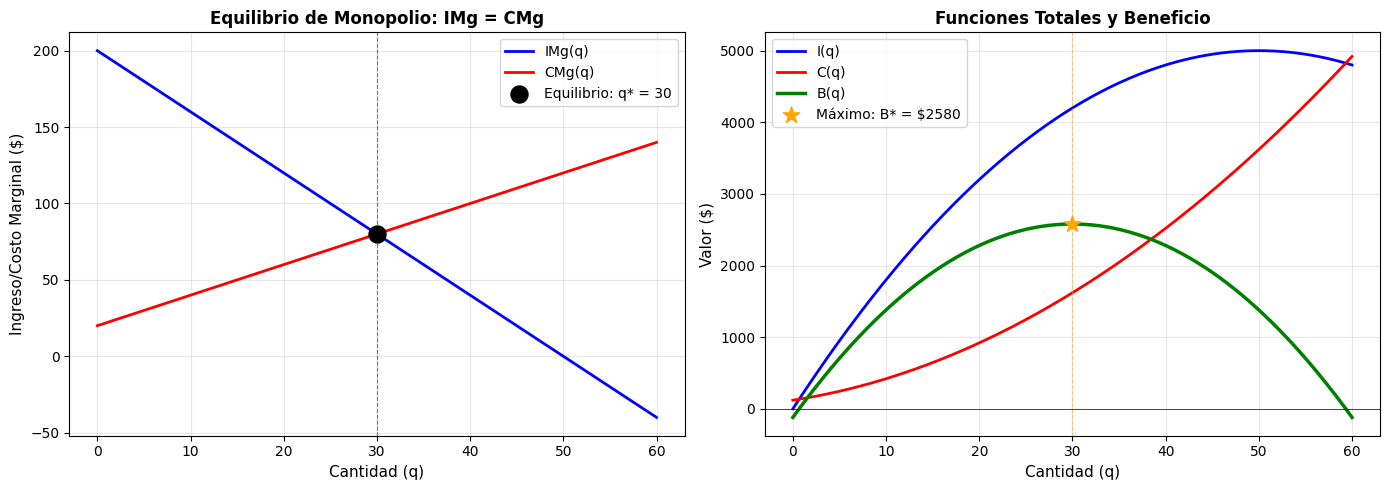

In [63]:
# Visualización del equilibrio
q_grid = np.linspace(0, 60, 300)

I_num = sp.lambdify(q, I)
C_num = sp.lambdify(q, C)
B_num = sp.lambdify(q, B)
IMg_num = sp.lambdify(q, IMg)
CMg_num = sp.lambdify(q, CMg)

I_vals = I_num(q_grid)
C_vals = C_num(q_grid)
B_vals = B_num(q_grid)
IMg_vals = IMg_num(q_grid)
CMg_vals = CMg_num(q_grid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Funciones marginales y equilibrio
ax1.plot(q_grid, IMg_vals, label='IMg(q)', linewidth=2, color='blue')
ax1.plot(q_grid, CMg_vals, label='CMg(q)', linewidth=2, color='red')
ax1.scatter([q_opt], [IMg.subs(q, q_opt)], c='black', s=150, zorder=5, marker='o',
           label=f'Equilibrio: q* = {q_opt}')
ax1.axvline(q_opt, color='black', linewidth=0.8, linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Cantidad (q)', fontsize=11)
ax1.set_ylabel('Ingreso/Costo Marginal ($)', fontsize=11)
ax1.set_title('Equilibrio de Monopolio: IMg = CMg', fontsize=12, fontweight='bold')
ax1.legend()

# Gráfico 2: Funciones totales y beneficio
ax2.plot(q_grid, I_vals, label='I(q)', linewidth=2, color='blue')
ax2.plot(q_grid, C_vals, label='C(q)', linewidth=2, color='red')
ax2.plot(q_grid, B_vals, label='B(q)', linewidth=2.5, color='green')
ax2.scatter([q_opt], [B_opt], c='orange', s=150, zorder=5, marker='*',
           label=f'Máximo: B* = ${float(B_opt):.0f}')
ax2.axvline(q_opt, color='orange', linewidth=0.8, linestyle='--', alpha=0.5)
ax2.axhline(0, color='black', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Cantidad (q)', fontsize=11)
ax2.set_ylabel('Valor ($)', fontsize=11)
ax2.set_title('Funciones Totales y Beneficio', fontsize=12, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

---

## ⚠️ PARTE 6: ERRORES COMUNES Y CÓMO EVITARLOS

### Error 1: Olvidar la constante de integración

❌ **MAL:**
```python
C = sp.integrate(CMg, q)  # Falta + F
```

✅ **BIEN:**
```python
C = sp.integrate(CMg, q) + F
```

**¿Por qué es importante?** Sin la constante, no puedes determinar el valor exacto de la función total. La constante representa información económica crucial como el costo fijo.

---

### Error 2: No extraer la solución de solve()

❌ **MAL:**
```python
q_opt = sp.solve(sp.Eq(IMg, CMg), q)  # Retorna lista
# Resultado: [30] (lista)
```

✅ **BIEN:**
```python
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]  # Extrae primer valor
# Resultado: 30 (número)
```

**¿Por qué?** `sp.solve()` SIEMPRE retorna una lista (incluso si hay una sola solución). Si no usas `[0]`, tendrás errores al sustituir o graficar.

---

### Error 3: División por cero en gráficos

❌ **MAL:**
```python
q_grid = np.linspace(0, 100, 300)  # Empieza en 0
CMed = C / q  # División por cero cuando q=0
CMed_vals = CMed_num(q_grid)  # Error o valor infinito
```

✅ **BIEN:**
```python
q_grid = np.linspace(0.1, 100, 300)  # Empieza en 0.1
```

**¿Cuándo aplica?** Siempre que calcules costo medio, ingreso medio, o cualquier función con q en el denominador.

---

### Error 4: No convertir a función numérica antes de graficar

❌ **MAL (muy lento):**
```python
C_vals = [C.subs(q, val) for val in q_grid]  # Evalúa simbólicamente
# Tarda varios segundos para 300 puntos
```

✅ **BIEN (1000x más rápido):**
```python
C_num = sp.lambdify(q, C)  # Convierte a función numérica
C_vals = C_num(q_grid)      # Evalúa numéricamente
# Tarda milisegundos
```

**¿Por qué?** Las operaciones simbólicas son muy lentas. `lambdify()` convierte a código NumPy optimizado.

---

### Error 5: No simplificar expresiones complejas

❌ **MAL:**
```python
CMed = C / q
# Resultado: (q**2 + 20*q + 100)/q  (difícil de interpretar)
```

✅ **BIEN:**
```python
CMed = sp.simplify(C / q)
# Resultado: q + 20 + 100/q  (clara estructura)
```

**¿Cuándo usar?** Después de divisiones, restas de fracciones, o cualquier operación que genere expresiones largas.

---

### Error 6: Confundir estructuras de mercado

❌ **MAL (en monopolio):**
```python
# Usar condición de competencia perfecta
q_opt = sp.solve(sp.Eq(p, CMg), q)[0]
```

✅ **BIEN (en monopolio):**
```python
# Calcular IMg y usar condición correcta
IMg = sp.diff(I, q)
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]
```

**Regla:** 
- **Competencia Perfecta:** `p = CMg`
- **Monopolio/Duopolio:** `IMg = CMg`

---

### Error 7: Olvidar verificar resultados

❌ **MAL:**
```python
C = sp.integrate(CMg, q) + F
# No verificar si la integral es correcta
```

✅ **BIEN:**
```python
C = sp.integrate(CMg, q) + F
# Verificar derivando
verificacion = sp.diff(C, q)
assert verificacion == CMg  # Debe ser True
```

**Práctica recomendada:** Siempre verifica integrando y luego derivando para recuperar la función original.

---

## 🎓 PARTE 7: RESUMEN EJECUTIVO

### Flujo de Trabajo Completo

```python
# 1. IMPORTAR LIBRERÍAS
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 2. DEFINIR VARIABLES SIMBÓLICAS
q = sp.symbols('q', positive=True)
F = sp.symbols('F')

# 3. DEFINIR FUNCIÓN MARGINAL (del problema)
CMg = 20 + 2*q

# 4. INTEGRAR PARA OBTENER FUNCIÓN TOTAL
C = sp.integrate(CMg, q) + F

# 5. DETERMINAR CONSTANTE DE INTEGRACIÓN
F_sol = sp.solve(sp.Eq(C.subs(q, 0), 100), F)[0]
C = C.subs(F, F_sol)

# 6. CALCULAR FUNCIONES DERIVADAS
CMed = sp.simplify(C / q)

# 7. ENCONTRAR PUNTOS CRÍTICOS
dCMed = sp.diff(CMed, q)
q_min = sp.solve(sp.Eq(dCMed, 0), q)[0]
CMed_min = CMed.subs(q, q_min)

# 8. VISUALIZAR
q_grid = np.linspace(0.1, 15, 300)
CMed_num = sp.lambdify(q, CMed)
CMed_vals = CMed_num(q_grid)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(q_grid, CMed_vals, label='$C_{med}(q)$', linewidth=2)
ax.scatter([q_min], [CMed_min], c='red', s=150, marker='*')
ax.axhline(0, color='black', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('Cantidad (q)')
ax.set_ylabel('Costo Medio ($)')
ax.set_title('Costo Medio y su Punto Mínimo')
ax.legend()
plt.tight_layout()
plt.show()
```

---

### 📋 Tabla de Referencia Rápida

| Paso | Acción | Función SymPy | Ejemplo |
|------|--------|---------------|---------|
| 1 | Crear variables | `sp.symbols()` | `q = sp.symbols('q', positive=True)` |
| 2 | Definir marginal | Operadores Python | `CMg = 20 + 2*q` |
| 3 | Integrar | `sp.integrate()` | `C = sp.integrate(CMg, q) + F` |
| 4 | Resolver constante | `sp.solve(sp.Eq())` | `F_sol = sp.solve(sp.Eq(C.subs(q,0), 100), F)[0]` |
| 5 | Sustituir | `.subs()` | `C = C.subs(F, F_sol)` |
| 6 | Derivar | `sp.diff()` | `CMg = sp.diff(C, q)` |
| 7 | Simplificar | `sp.simplify()` | `CMed = sp.simplify(C/q)` |
| 8 | Convertir a numérica | `sp.lambdify()` | `C_num = sp.lambdify(q, C)` |

---

### 🎯 Decisiones Clave

#### ¿Cuándo agregar constante de integración?

| Caso | ¿Agregar +C? | Razón |
|------|-------------|-------|
| Costo Total | **SÍ** (+F) | Hay costo fijo |
| Ingreso Total | **NO** | I(0) = 0 |
| Utilidad Total | **NO** | U(0) = 0 |
| Producto Total | **NO** | P(0) = 0 |

#### ¿Qué condición de equilibrio usar?

| Estructura de Mercado | Condición | Código |
|-----------------------|-----------|--------|
| **Competencia Perfecta** | p = CMg | `sp.solve(sp.Eq(p, CMg), q)[0]` |
| **Monopolio** | IMg = CMg | `sp.solve(sp.Eq(IMg, CMg), q)[0]` |
| **Duopolio** | IMg₁ = CMg₁ | `sp.solve(sp.Eq(IMg1, CMg1), q1)[0]` |

---

### 💡 Consejos para el Examen

1. **Lee el problema completo** antes de empezar a escribir código
2. **Identifica la estructura de mercado** para usar la condición correcta
3. **Anota las condiciones iniciales** (ej: C(0) = 100)
4. **Verifica tus integrales** derivando el resultado
5. **Usa [0]** después de `sp.solve()` para extraer valores
6. **Empieza en 0.1** (no 0) cuando grafiques funciones con q en el denominador
7. **Simplifica** después de divisiones o restas de fracciones
8. **Interpreta económicamente** cada resultado matemático
9. **Marca puntos importantes** en los gráficos (máximos, mínimos, equilibrios)
10. **Usa `sp.lambdify()`** antes de graficar para mejor performance

---

### 🔑 Fórmulas Esenciales

**Relación Marginal-Total:**
$$F(x) = \int f(x) \, dx + C$$

**Beneficio:**
$$B(q) = I(q) - C(q)$$

**Maximización de Beneficio:**
$$\frac{dB}{dq} = 0 \Rightarrow IMg = CMg$$

**Costo Medio Mínimo:**
$$\frac{dC_{med}}{dq} = 0$$

**Ingreso Marginal en Monopolio (si $p = a - bq$):**
$$IMg = a - 2bq$$

---

### 📊 Patrón de Análisis Estándar

```
1. LEER el problema
   ↓
2. IDENTIFICAR: ¿Competencia, Monopolio o Duopolio?
   ↓
3. ANOTAR: Función marginal + Condiciones iniciales
   ↓
4. INTEGRAR: Obtener función total
   ↓
5. RESOLVER: Determinar constantes
   ↓
6. CALCULAR: Funciones derivadas (CMed, Beneficio, etc.)
   ↓
7. OPTIMIZAR: Encontrar máximos/mínimos
   ↓
8. VISUALIZAR: Graficar funciones
   ↓
9. INTERPRETAR: Explicar el significado económico
```

---

### 🎬 Ejemplo Rápido Completo

**Problema:** CMg = 10 + 2q, C(0) = 50, Precio de mercado p = 90

```python
# Setup
q = sp.symbols('q', positive=True)
CMg = 10 + 2*q

# Costo Total
C = sp.integrate(CMg, q) + 50  # Ya sabemos F=50

# Ingreso (competencia perfecta)
I = 90 * q

# Beneficio
B = I - C  # = 90q - (q² + 10q + 50) = -q² + 80q - 50

# Cantidad óptima
dB = sp.diff(B, q)
q_opt = sp.solve(sp.Eq(dB, 0), q)[0]  # q* = 40

# Beneficio máximo
B_max = B.subs(q, q_opt)  # B* = 1550
```

**Respuesta:** Producir 40 unidades para obtener beneficio de $1,550.

---

## 🎯 CHECKLIST PRE-EXAMEN

Antes de tu evaluación, asegúrate de poder hacer esto sin ayuda:

- [ ] Definir variables simbólicas con restricciones apropiadas
- [ ] Integrar funciones polinómicas y exponenciales
- [ ] Determinar constantes de integración con condiciones iniciales
- [ ] Calcular costo medio, beneficio, y otras funciones derivadas
- [ ] Encontrar máximos y mínimos igualando derivadas a cero
- [ ] Resolver ecuaciones con `sp.solve(sp.Eq(...), variable)[0]`
- [ ] Convertir funciones simbólicas a numéricas con `lambdify()`
- [ ] Crear gráficos básicos con matplotlib
- [ ] Interpretar resultados en contexto económico
- [ ] **Identificar cuándo usar p = CMg vs IMg = CMg según estructura de mercado**
- [ ] **Calcular IMg derivando la función de ingreso total**

---

## 📚 REFERENCIAS Y MATERIAL ADICIONAL

- **Documentación SymPy:** https://docs.sympy.org/
- **Guía NumPy:** https://numpy.org/doc/
- **Tutorial Matplotlib:** https://matplotlib.org/stable/tutorials/
- **Cheatsheet de librerías:** Ver archivo `cheatsheet_librerias.md` en esta carpeta